# Part 1: Basic concepts

Querying large datasets, by "large", it means the size of the data is larger than RAM. 

So there is a need to clean up memory regularly for each batch of data. 

There are two main big data processing options: 

Option 1: Data Streaming (If data is processed continuously) / Batch processing (If the data is at rest)

- Scenario: Single machine
- WHen to use: This option is ideal when working with data that is continuously generated and needs to be processed in real-time or near-real-time, such as logs, sensor data, or user activity streams. The data can be ingested, processed, and analyzed as it arrives, providing timely insights.

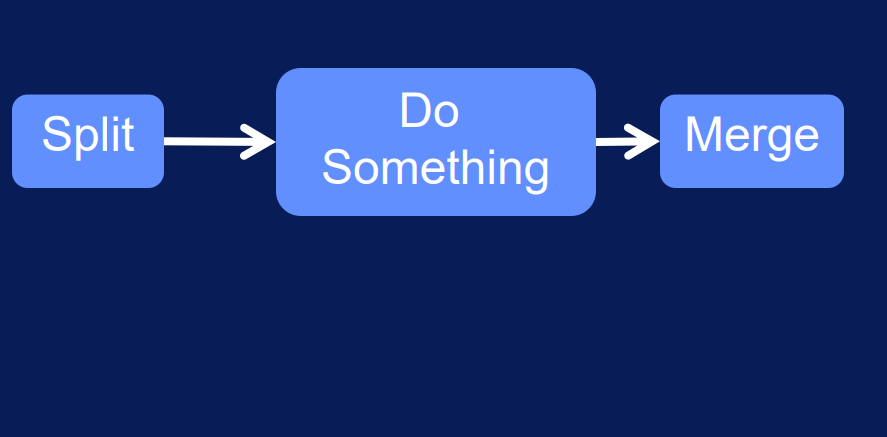

Option 2: Map-Reduce process in Big data processing:

- Scenario: Using multiple machines / Distributed environment to operate one task
- When datasets are large, chunk-by-chunk processing can become slow due to the constant disk I/O operations required. For querying, chunk-by-chunk is sufficient, but it is exacerbated when the processing involves complex operations that cannot be easily broken down into smaller, independent chunks.

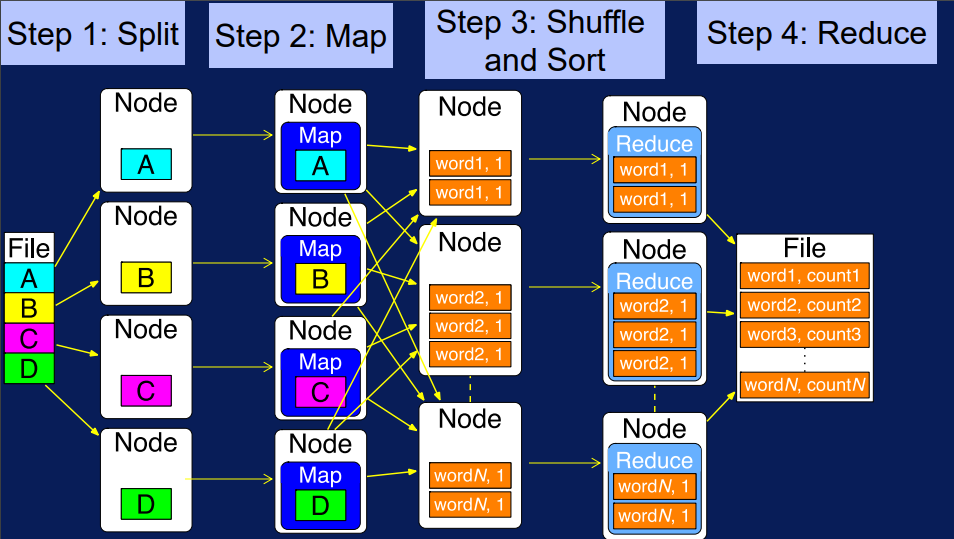

If we use single PC to perform query, option 1 is a choice. 

## Part 2: Query datafiles (csv/json...) using Spark

In [1]:
import os

# Define the base path for the "demo_data" folder
base_path = os.path.join(os.getcwd(), "demo_data")

# Ensure the "demo_data" directory exists
os.makedirs(base_path, exist_ok=True)

# File paths
csv_file_path = os.path.join(base_path, "datafile.csv")
json_file_path = os.path.join(base_path, "datafile.json")
xml_file_path = os.path.join(base_path, "datafile.xml")
txt_file_path = os.path.join(base_path, "datafile.txt")

In [3]:
from pyspark.sql import SparkSession

# Initialize a SparkSession
spark = SparkSession.builder \
    .appName("CSVBatchQuery") \
    .getOrCreate()

# Read a CSV file into a DataFrame
# This line hint Spark's batch processing capabilities 
csv_df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# Show the DataFrame content (this will output the first 20 rows by default)
csv_df.show()

# Perform batch queries - for example, filtering
batch_query_result = csv_df.filter(csv_df['published'] > 1900)

# Show the result of the batch query
batch_query_result.show()

# Stop the Spark session
spark.stop()

+-------------------+---------------+---------+
|              title|         author|published|
+-------------------+---------------+---------+
|          Moby Dick|Herman Melville|     1851|
|Pride and Prejudice|    Jane Austen|     1813|
|               1984|  George Orwell|     1949|
+-------------------+---------------+---------+

+-----+-------------+---------+
|title|       author|published|
+-----+-------------+---------+
| 1984|George Orwell|     1949|
+-----+-------------+---------+



In [4]:
from pyspark.sql import SparkSession

# Initialize a SparkSession
spark = SparkSession.builder \
    .appName("JSONBatchQuery") \
    .getOrCreate()

# Read a JSON file into a DataFrame
json_df = spark.read.json(json_file_path)

# Show the DataFrame content
json_df.show()

# Perform batch queries - for example, selecting specific fields
batch_query_result = json_df.select("title")

# Show the result of the batch query
batch_query_result.show()

# Stop the Spark session
spark.stop()

AnalysisException: Since Spark 2.3, the queries from raw JSON/CSV files are disallowed when the
referenced columns only include the internal corrupt record column
(named _corrupt_record by default). For example:
spark.read.schema(schema).csv(file).filter($"_corrupt_record".isNotNull).count()
and spark.read.schema(schema).csv(file).select("_corrupt_record").show().
Instead, you can cache or save the parsed results and then send the same query.
For example, val df = spark.read.schema(schema).csv(file).cache() and then
df.filter($"_corrupt_record".isNotNull).count().

In [5]:
from pyspark.sql import SparkSession

# Initialize a SparkSession with MongoDB support
spark = SparkSession.builder \
    .appName("MongoDBBatchQuery") \
    .config("spark.mongodb.input.uri", "mongodb://your_mongo_server/database.collection") \
    .config("spark.mongodb.output.uri", "mongodb://your_mongo_server/database.collection") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1") \
    .getOrCreate()

# Read data from MongoDB into a DataFrame
mongo_df = spark.read.format("mongo").load()

# Show the DataFrame content
mongo_df.show()

# Perform batch queries - for example, using SQL-like syntax
batch_query_result = mongo_df.filter(mongo_df['published'] == '1900')

# Show the result of the batch query
batch_query_result.show()

# Stop the Spark session
spark.stop()

Py4JJavaError: An error occurred while calling o82.load.
: org.apache.spark.SparkClassNotFoundException: [DATA_SOURCE_NOT_FOUND] Failed to find the data source: mongo. Please find packages at `https://spark.apache.org/third-party-projects.html`.
	at org.apache.spark.sql.errors.QueryExecutionErrors$.dataSourceNotFoundError(QueryExecutionErrors.scala:724)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:647)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSourceV2(DataSource.scala:697)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:208)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:172)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:834)
Caused by: java.lang.ClassNotFoundException: mongo.DefaultSource
	at java.base/java.net.URLClassLoader.findClass(URLClassLoader.java:476)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:588)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:521)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$5(DataSource.scala:633)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$4(DataSource.scala:633)
	at scala.util.Failure.orElse(Try.scala:224)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:633)
	... 15 more
